# GF($2^m$) Square

In [1]:
from qualtran import Bloq, CompositeBloq, BloqBuilder, Signature, Register
from qualtran import QBit, QInt, QUInt, QAny
from qualtran.drawing import show_bloq, show_call_graph, show_counts_sigma
from typing import *
import numpy as np
import sympy
import cirq

## `GF2Square`
In place squaring for elements in GF($2^m$)

The bloq implements in-place squaring of a quantum registers storing elements
from GF($2^m$). Specifically, it implements the transformation

$$
    |a\rangle \rightarrow |a^2\rangle
$$

The key insight is that for elements in GF($2^m$),
$$
    a^2 =a_0 + a_1 x^2 + a_2 x^4 + ... + a_{n-1} x^{2(n - 1)}
$$

Thus, squaring can be implemented via a linear reversible circuit using only CNOT gates.

#### Parameters
 - `bitsize`: The degree $m$ of the galois field $GF(2^m)$. Also corresponds to the number of qubits in the input register to be squared. 

#### Registers
 - `x`: Input THRU register of size $m$ that stores elements from $GF(2^m)$.


In [2]:
from qualtran.bloqs.gf_arithmetic import GF2Square

### Example Instances

In [3]:
gf16_square = GF2Square(4)

In [4]:
import sympy

m = sympy.Symbol('m')
gf2_square_symbolic = GF2Square(m)

#### Graphical Signature

In [5]:
from qualtran.drawing import show_bloqs
show_bloqs([gf16_square, gf2_square_symbolic],
           ['`gf16_square`', '`gf2_square_symbolic`'])

### Call Graph

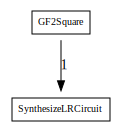

#### Counts totals:
 - `SynthesizeLRCircuit`: 1

In [6]:
from qualtran.resource_counting.generalizers import ignore_split_join
gf16_square_g, gf16_square_sigma = gf16_square.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(gf16_square_g)
show_counts_sigma(gf16_square_sigma)